In [1]:
import os 

In [2]:
%matplotlib inline
import sys

sys.path.append(os.path.abspath('../../src'))

import numpy as np
import matplotlib.pyplot as plt
from src import igraph_testing as ig


In [3]:
def find_coords(filename):
    """
        find coordinates of file

        Args:
            filename(string): path to file

        Returns:
            coords: x,y,x coords of file in a list.
        """
    with open(filename, "r") as file:
        header = file.readline().split(' ')
        dimX, dimY = int(header[0]), int(header[1])
        if len(header) < 3:
            dimZ = 1
        else:
            if int(header[2]) == 0:
                dimZ = 1
            else:
                dimZ = int(header[2])

        if dimZ > 1:
            # dimZ = dimX * dimY
            is_2d = False
        coords = [dimX, dimY, dimZ]
    return coords

def filterGraph(graph):
    keptEdges = [edge for edge in graph.get_edgelist()
                 if graph.vs[edge[0]]['color'] == graph.vs[edge[1]]['color']
                 or 'red' in {graph.vs[edge[0]]['color'], graph.vs[edge[1]]['color']}
                 or 'blue' in {graph.vs[edge[0]]['color'], graph.vs[edge[1]]['color']}]

    return graph.subgraph_edges(keptEdges, delete_vertices=False)

def find_BTR_tortuosity(g, is_2d, filename):
    """
        finds and visualizes the tortuosity of Black to Red vertices
        Args:
            g (ig.Graph): The input graph.
            is_2d(bool): true if 2D of false if otherwise
            filename(string): path to file

        Returns:
            No return but a visualization is created and displayed on screen.
        """
    numVertices = g.vcount()
    redVertex = g.vcount() - 2
    blackToRedList = []
    filteredGraph = filterGraph(g)
    idOfPixelIn1DArray, tort = read_BTR_file_and_extract_numbers(filename)
    #Calculate vertex frequencies
    vertex_frequency = [0] * numVertices
    for i in range(len(idOfPixelIn1DArray)):
        vertex_frequency[idOfPixelIn1DArray[i]] = tort[i]

    vertex_frequency = vertex_frequency[:-3]
    dimX,dimY,dimZ = coords = find_coords(filename)
    data_2d = np.array(vertex_frequency).reshape(dimY, dimX)

    # Create the heatmap
    #plt.rcParams.update({'font.size': 20})
    plt.title("Black to Red Tortuosity HeatMap")
    plt.imshow(data_2d, cmap='hsv', interpolation='nearest')
    plt.colorbar()  # Add a colorbar to show the values
    plt.show()

def find_WTB_tortuosity(g, is_2d, filename):
    """
        finds and visualizes the tortuosity of White to Black vertices
        Args:
            g (ig.Graph): The input graph.
            is_2d(bool): true if 2D of false if otherwise
            filename(string): path to file

        Returns:
            No return but a visualization is created and displayed on screen.
        """
    numVertices = g.vcount()
    redVertex = g.vcount() - 2
    blueVertex = g.vcount() - 1
    whiteToBlueList = []
    idOfPixelIn1DArray, tort = read_WTB_file_and_extract_numbers(filename)
    #Calculate vertex frequencies
    vertex_frequency = [0] * numVertices
    for i in range(len(idOfPixelIn1DArray)):
        vertex_frequency[idOfPixelIn1DArray[i]] = tort[i]

    vertex_frequency = vertex_frequency[:-3]
    dimX,dimY,dimZ = coords = find_coords(filename)
    data_2d = np.array(vertex_frequency).reshape(dimY, dimX)

    # Create the heatmap
    #plt.rcParams.update({'font.size': 20})
    plt.title("White to Blue Tortuosity HeatMap")
    plt.imshow(data_2d, cmap='hsv', interpolation='nearest')
    plt.colorbar()  # Add a colorbar to show the values
    plt.show()

# Define the function to read the file and extract the numbers
def read_BTR_file_and_extract_numbers(base_filename):
    """
        reads Black to Red Tortuosity ID file and extracts numbers needed from it
        Args:
            base_filename(string): path to file

        Returns:
            idOfPixelIn1DArray(list): list of id of pixel in 1D array
            tort(list): list of tortuosity, index matches that of idOfPixelIn1DArray
        """
    base_filename = base_filename[16:-4]
    file_path = f"../../data/distances/{base_filename}-IdTortuosityBlackToRed.txt"
    idOfPixelIn1DArray = []
    tort = []
    # Open the file in read mode
    with open(file_path, "r") as file:
        # Read each line in the file
        for line in file:
            # Split the line into a list of strings
            parts = line.split()
            # Extract the first and second numbers and convert them to appropriate types
            first_number = int(parts[0])
            second_number = float(parts[1])
            # Append the numbers to their respective lists
            idOfPixelIn1DArray.append(first_number)
            tort.append(second_number)

    return idOfPixelIn1DArray, tort

def read_WTB_file_and_extract_numbers(base_filename):
    """
        reads White to Black Tortuosity ID file and extracts numbers needed from it
        Args:
            base_filename(string): path to file

        Returns:
            idOfPixelIn1DArray(list): list of id of pixel in 1D array
            tort(list): list of tortuosity, index matches that of idOfPixelIn1DArray
        """
    base_filename = base_filename[16:-4]
    file_path = f"../../data/distances/{base_filename}-IdTortuosityWhiteToBlue.txt"
    # base_filename = base_filename[5:-4]
    # file_path = f"distances/{base_filename}-IdTortuosityWhiteToBlue.txt"
    idOfPixelIn1DArray = []
    tort = []

    # Open the file in read mode
    with open(file_path, "r") as file:
        # Read each line in the file
        for line in file:
            # Split the line into a list of strings
            parts = line.split()
            # Extract the first and second numbers and convert them to appropriate types
            first_number = int(parts[0])
            second_number = float(parts[1])
            # Append the numbers to their respective lists
            idOfPixelIn1DArray.append(first_number)
            tort.append(second_number)

    return idOfPixelIn1DArray, tort

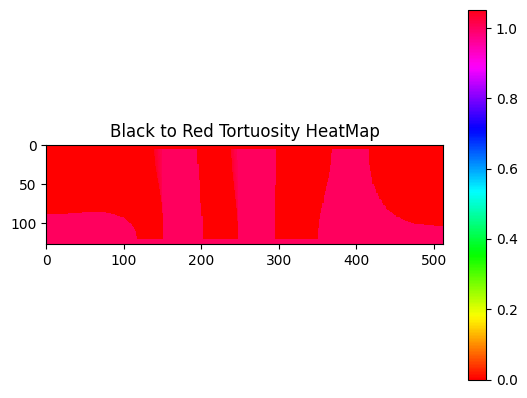

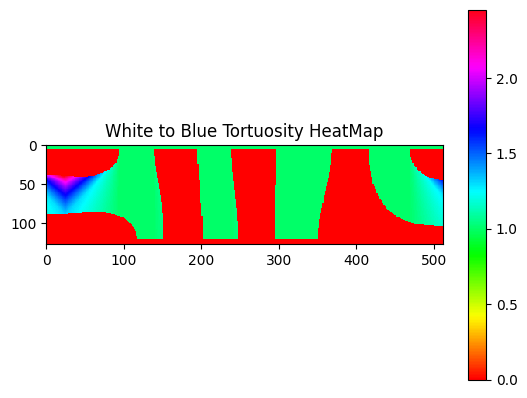

In [4]:
filename = "../../data/data/data_0.5_2.2_001900.txt"
graphData = ig.generateGraphAdj(filename)
find_BTR_tortuosity(graphData.graph, graphData.is_2D, filename)
find_WTB_tortuosity(graphData.graph, graphData.is_2D, filename)

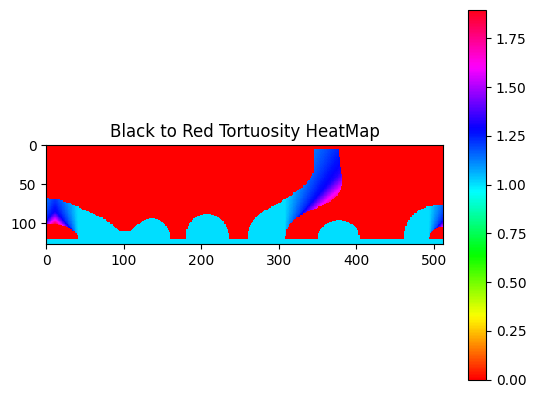

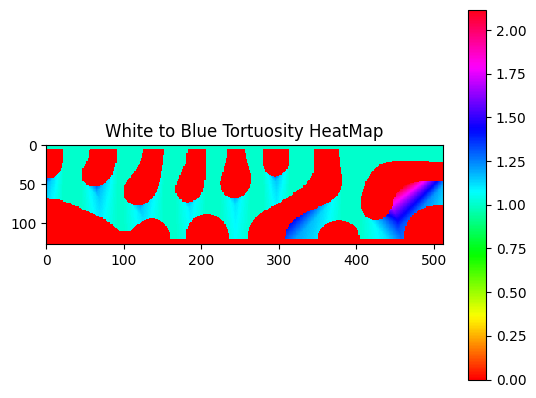

In [5]:
filename = "../../data/data/data_0.514_2.4_000220.txt"
graphData = ig.generateGraphAdj(filename)
find_BTR_tortuosity(graphData.graph, graphData.is_2D, filename)
find_WTB_tortuosity(graphData.graph, graphData.is_2D, filename)


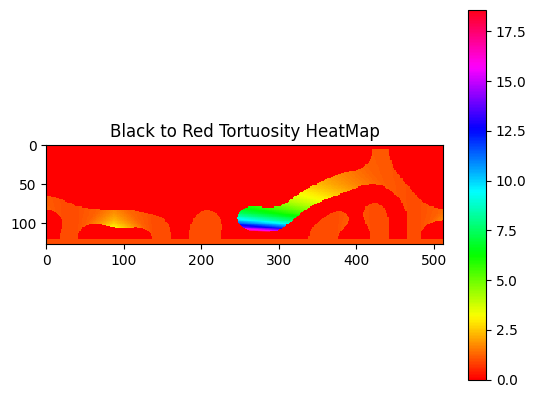

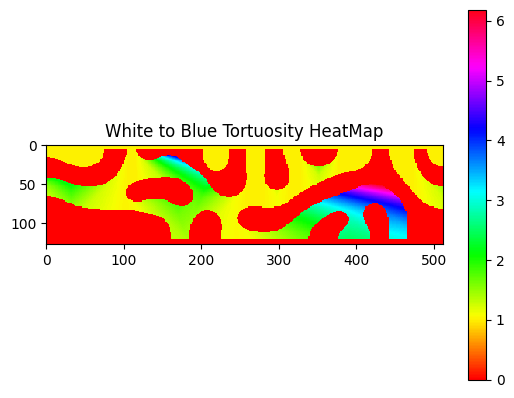

In [6]:
filename = "../../data/data/data_0.514_2.6_000080.txt"
graphData = ig.generateGraphAdj(filename)
find_BTR_tortuosity(graphData.graph, graphData.is_2D, filename)
find_WTB_tortuosity(graphData.graph, graphData.is_2D, filename)

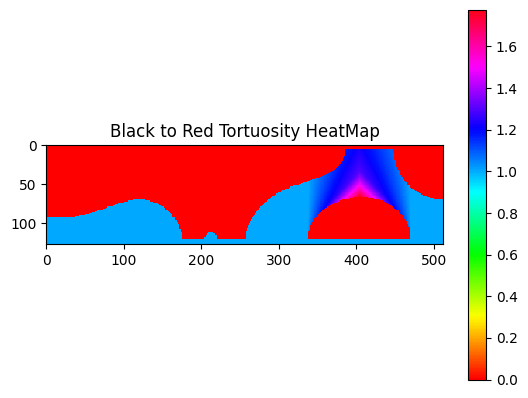

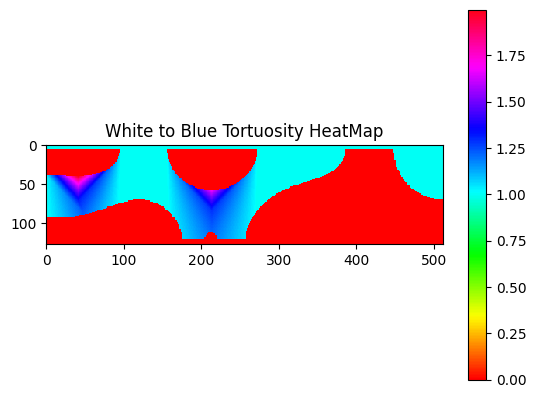

In [7]:
filename = "../../data/data/data_0.514_2.6_000980.txt"
graphData = ig.generateGraphAdj(filename)
find_BTR_tortuosity(graphData.graph, graphData.is_2D, filename)
find_WTB_tortuosity(graphData.graph, graphData.is_2D, filename)

In [ ]:
filename = "../../data/data/data_0.514_2.8_000200.txt"
graphData = ig.generateGraphAdj(filename)
find_BTR_tortuosity(graphData.graph, graphData.is_2D, filename)
find_WTB_tortuosity(graphData.graph, graphData.is_2D, filename)

In [ ]:
filename = "../../data/data/data_0.514_2.8_005540.txt"
graphData = ig.generateGraphAdj(filename)
find_BTR_tortuosity(graphData.graph, graphData.is_2D, filename)
find_WTB_tortuosity(graphData.graph, graphData.is_2D, filename)

In [ ]:
filename = "../../data/data/data_0.543_2.6_000060.txt"
graphData = ig.generateGraphAdj(filename)
find_BTR_tortuosity(graphData.graph, graphData.is_2D, filename)
find_WTB_tortuosity(graphData.graph, graphData.is_2D, filename)